In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -q keras

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from sklearn.model_selection import train_test_split
from keras import datasets, layers, models, preprocessing, applications, utils
from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Input
from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D, Activation, BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import regularizers
from keras import optimizers
from keras.models import load_model

In [ ]:
model=applications.VGG16(input_shape=(224,224,3),weights=None,classes=4)
model.summary()
model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
IMG_SIZE=[512,512]

train_path='/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train'
test_path='/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation'

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model=models.Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(512,512,3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

opt = optimizers.Adam(lr=1e-3, decay=1e-3/30)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        )
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

testing_set=test_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

Found 1600 images belonging to 5 classes.
Found 492 images belonging to 5 classes.


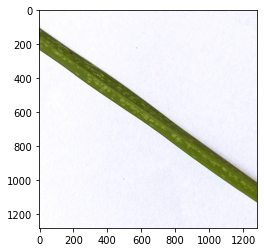

In [ ]:
#print(testing_set.classes)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/'+training_set.filenames[0])
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import math
nb_train_samples = len(training_set.filenames)
num_classes = len(training_set.class_indices)

#predict_size_train = int(math.ceil(nb_train_samples / 32))

#bottleneck_features_train = vgg.predict_generator(training_set, predict_size_train)

#np.save('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/train.npy', bottleneck_features_train)

In [ ]:
nb_test_samples = len(testing_set.filenames)
predict_size_test = int(math.ceil(nb_test_samples / 32))
bottleneck_features_test = vgg.predict_generator(testing_set, predict_size_test)
np.save('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/test.npy', bottleneck_features_test)

NameError: ignored

In [ ]:
# load the bottleneck features saved earlier
#train_data = np.load('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/train.npy')

# get the class labels for the training data, in the original order
train_labels = training_set.classes

# convert the training labels to categorical vectors
train_labels = utils.to_categorical(train_labels, num_classes=num_classes)

In [ ]:
model_new = models.Sequential()
model_new.add(layers.Flatten(input_shape=train_data.shape[1:]))
model_new.add(layers.Dense(num_classes, activation='softmax'))
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
)
model_new.fit(train_data,train_labels,epochs=50,validation_data=(test_data,test_labels))

In [ ]:
print(testing_set.class_indices)

{'BrownSpot': 0, 'Healthy': 1, 'Hispa': 2, 'LeafBlast': 3}


In [ ]:
#test_data = np.load('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/test.npy')

# get the class labels for the training data, in the original order
test_labels = testing_set.classes

# convert the training labels to categorical vectors
test_labels = utils.to_categorical(test_labels, num_classes=num_classes)

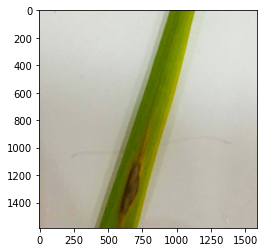

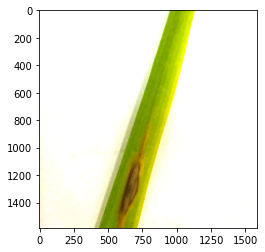

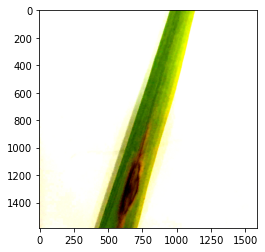

In [ ]:
from PIL import Image
from PIL import ImageEnhance

image = Image.open(training_set._filepaths[1599])
plt.figure()
plt.imshow(image)

enh_bri = ImageEnhance.Brightness(image)
brightness = 1.5
image_brightened = enh_bri.enhance(brightness)
plt.figure()
plt.imshow(image_brightened)


enh_con = ImageEnhance.Contrast(image_brightened)
contrast = 1.5
image_contrasted = enh_con.enhance(contrast)
plt.figure()
plt.imshow(image_contrasted)

In [ ]:
from PIL import Image
from PIL import ImageEnhance
#test_data=[];
train_data=[];
for fname in training_set._filepaths:
  image = Image.open(fname)
  image=image.resize((512,512))
  enh_bri = ImageEnhance.Brightness(image)
  brightness = 1.5
  image_brightened = enh_bri.enhance(brightness)
  enh_con = ImageEnhance.Contrast(image_brightened)
  contrast = 1.5
  image_contrasted = enh_con.enhance(contrast)
  train_data.append(np.array(image_contrasted))





#train_data = np.array([np.array(Image.open(fname)) for fname in training_set._filepaths])
np.save('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/traindata512.npy',train_data)
#test_data = np.array([np.array(Image.open(fname)) for fname in testing_set._filepaths])

KeyboardInterrupt: ignored

In [ ]:
from PIL import Image
from PIL import ImageEnhance
test_data=[];
for fname in testing_set._filepaths:
  image = Image.open(fname)
  image=image.resize((224,224))
  test_data.append(np.array(image))
np.save('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/testdatanocon.npy',test_data)

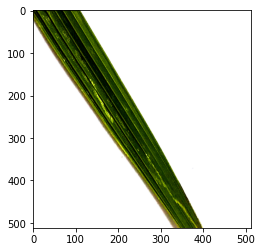

In [ ]:
traindata=np.load('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/traindatanocon.npy')
plt.imshow(test[388], cmap='gray')
plt.show()

In [ ]:
print(training_set._filepaths)

['/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095712.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095715.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095726.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_095736.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_100805.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103247.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103508.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103510.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103527.jpg', '/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/BrownSpot/IMG_20190419_103531.jpg', '/content/drive/My Drive/MI-P

In [ ]:
traindata=np.load('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/traindatanew512.npy')
traindata=traindata/255
trainlabels=np.load('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/train/trainlabelsnew512.npy')
testdata=np.load('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/testdatanew512.npy')
testlabels=np.load('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/testlabelsnew512.npy')
testdata=testdata/255

In [ ]:
history=model.fit(traindata,trainlabels,epochs=25,batch_size=32,shuffle=True,validation_data=(testdata,testlabels))

Train on 1600 samples, validate on 492 samples
Epoch 1/25
1600/1600 [==============================] - 20s 12ms/step - loss: 0.7135 - accuracy: 0.7403 - val_loss: 0.5493 - val_accuracy: 0.7495
Epoch 2/25
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5458 - accuracy: 0.7498 - val_loss: 0.5355 - val_accuracy: 0.7500
Epoch 3/25
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5358 - accuracy: 0.7483 - val_loss: 0.5266 - val_accuracy: 0.7530
Epoch 4/25
1600/1600 [==============================] - 13s 8ms/step - loss: 0.5178 - accuracy: 0.7538 - val_loss: 0.4715 - val_accuracy: 0.7769
Epoch 5/25
1600/1600 [==============================] - 13s 8ms/step - loss: 0.4790 - accuracy: 0.7705 - val_loss: 0.4409 - val_accuracy: 0.7932
Epoch 6/25
1600/1600 [==============================] - 13s 8ms/step - loss: 0.4323 - accuracy: 0.7956 - val_loss: 0.3914 - val_accuracy: 0.8283
Epoch 7/25
1600/1600 [==============================] - 13s 8ms/step - loss: 0.382

In [ ]:
model.evaluate(testdata,testlabels)

492/492 [==============================] - 2s 4ms/step


[0.2437256608022059, 0.9542682766914368]

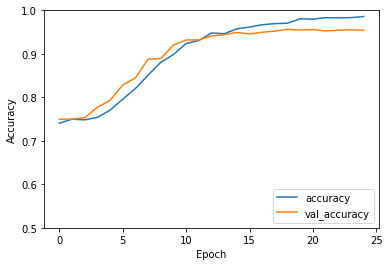

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/graph.png')

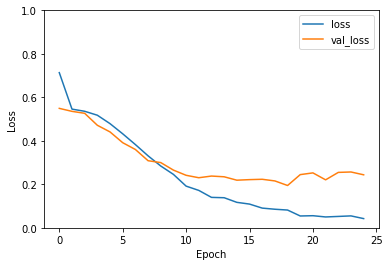

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/graph1.png')

In [ ]:
from sklearn.metrics import confusion_matrix
pred=model.predict(testdata)
pred=np.round(pred)
matrix = confusion_matrix(testlabels.argmax(axis=1),pred.argmax(axis=1))
print(matrix.diagonal()/matrix.sum(axis=1))

[0.93442623 0.88596491 0.90151515 0.89516129]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

result=precision_recall_fscore_support(testlabels,pred)
print(result)

(array([0.95798319, 0.87826087, 0.93700787, 0.87401575]), array([0.93442623, 0.88596491, 0.90151515, 0.89516129]), array([0.94605809, 0.88209607, 0.91891892, 0.88446215]), array([122, 114, 132, 124]))


In [ ]:
model.evaluate(testdata,testlabels)

492/492 [==============================] - 2s 4ms/step


[0.2437256608022059, 0.9542682766914368]

In [ ]:
model_new=tf.keras.models.load_model('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/CNN-Model.h5')

In [ ]:
model.save('/content/drive/My Drive/MI-Project/RiceDiseaseDataset/validation/CNN-Model.h5')

In [ ]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            multiple                  896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                 